<a href="https://colab.research.google.com/github/DhanashriDNair/POCs/blob/master/Covid_lab2_dhanashri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
path = "https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv"


In [0]:
path

'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ## data visualization 
import plotly.express as plotly ## plotting on world map

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
df = pd.read_csv(path)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [0]:
df.tail() 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
28243,NaN,Western Sahara,24.215500,-12.885800,5/7/20,6,0,5
28244,NaN,Sao Tome and Principe,0.186360,6.613081,5/7/20,187,4,4
28245,NaN,Yemen,15.552727,48.516388,5/7/20,25,5,1
28246,NaN,Comoros,-11.645500,43.333300,5/7/20,8,1,0
28247,NaN,Tajikistan,38.861034,71.276093,5/7/20,461,12,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  8560 non-null   object 
 1   Country/Region  28248 non-null  object 
 2   Lat             28248 non-null  float64
 3   Long            28248 non-null  float64
 4   Date            28248 non-null  object 
 5   Confirmed       28248 non-null  int64  
 6   Deaths          28248 non-null  int64  
 7   Recovered       28248 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


In [0]:
df = pd.read_csv(path,parse_dates=["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8560 non-null   object        
 1   Country/Region  28248 non-null  object        
 2   Lat             28248 non-null  float64       
 3   Long            28248 non-null  float64       
 4   Date            28248 non-null  datetime64[ns]
 5   Confirmed       28248 non-null  int64         
 6   Deaths          28248 non-null  int64         
 7   Recovered       28248 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [0]:
df.drop(["Province/State"],axis=1,inplace=True)

KeyError: ignored

In [0]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
df.rename(columns={"Country/Region":"Country"},inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
df["Active"] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [0]:
df.tail()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
28243,Western Sahara,24.215500,-12.885800,2020-05-07,6,0,5,1
28244,Sao Tome and Principe,0.186360,6.613081,2020-05-07,187,4,4,179
28245,Yemen,15.552727,48.516388,2020-05-07,25,5,1,19
28246,Comoros,-11.645500,43.333300,2020-05-07,8,1,0,7
28247,Tajikistan,38.861034,71.276093,2020-05-07,461,12,0,449


In [0]:
# Data for latest data 
top = df[df['Date']=='2020-05-07']
top.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
27984,Afghanistan,33.0000,65.0000,2020-05-07,3563,106,468,2989
27985,Albania,41.1533,20.1683,2020-05-07,842,31,605,206
27986,Algeria,28.0339,1.6596,2020-05-07,5182,483,2323,2376
27987,Andorra,42.5063,1.5218,2020-05-07,752,47,526,179
27988,Angola,-11.2027,17.8739,2020-05-07,36,2,11,23


In [0]:
top = df[df['Date']==df['Date'].max()]
top.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
27984,Afghanistan,33.0000,65.0000,2020-05-07,3563,106,468,2989
27985,Albania,41.1533,20.1683,2020-05-07,842,31,605,206
27986,Algeria,28.0339,1.6596,2020-05-07,5182,483,2323,2376
27987,Andorra,42.5063,1.5218,2020-05-07,752,47,526,179
27988,Angola,-11.2027,17.8739,2020-05-07,36,2,11,23


In [0]:
world = top.groupby("Country")["Recovered","Deaths","Active","Confirmed"].sum()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recovered,Deaths,Active,Confirmed
Country,,,,
Afghanistan,468,106,2989,3563
Albania,605,31,206,842
Algeria,2323,483,2376,5182
Andorra,526,47,179,752
Angola,11,2,23,36


In [0]:
world = world.reset_index()
world.head()

,Country,Recovered,Deaths,Active,Confirmed
0,Afghanistan,468,106,2989,3563
1,Albania,605,31,206,842
2,Algeria,2323,483,2376,5182
3,Andorra,526,47,179,752
4,Angola,11,2,23,36


In [0]:
world.tail()

,Country,Recovered,Deaths,Active,Confirmed
182,West Bank and Gaza,176,2,197,375
183,Western Sahara,5,0,1,6
184,Yemen,1,5,19,25
185,Zambia,103,4,46,153
186,Zimbabwe,5,4,25,34


In [0]:
# Plot on world map- active cases
figure = plotly.choropleth(world,locations="Country",locationmode="country names",
                           color="Active",range_color=[1,10000],
                           color_continuous_scale="bluered"
                           ,title="Countries With Active Cases")
figure.show()

In [0]:
## Plotting graph between Total Confirmed Cases Vs Date
total_confirmed = df.groupby('Date')['Confirmed',"Deaths","Recovered","Active"].sum()
total_confirmed = total_confirmed.reset_index()
total_confirmed.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [0]:
total_confirmed.tail()

,Date,Confirmed,Deaths,Recovered,Active
102,2020-05-03,3506723,247470,1100253,2159000
103,2020-05-04,3583049,251537,1136628,2194884
104,2020-05-05,3662685,257239,1171760,2233686
105,2020-05-06,3755335,263831,1217161,2274343
106,2020-05-07,3845712,269567,1255409,2320736


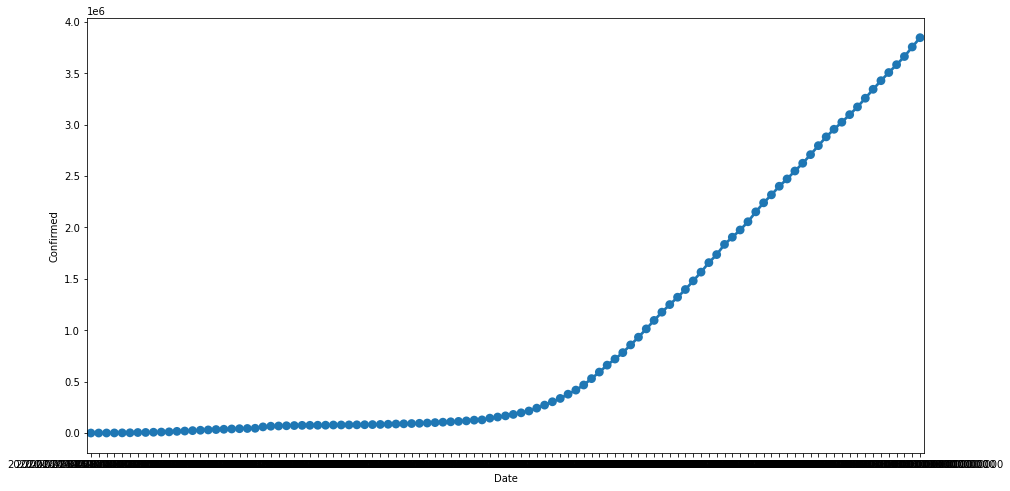

In [0]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=8)
x=total_confirmed['Date'].dt.date
y=total_confirmed['Confirmed']
sns.pointplot(x,y)
plt.show()

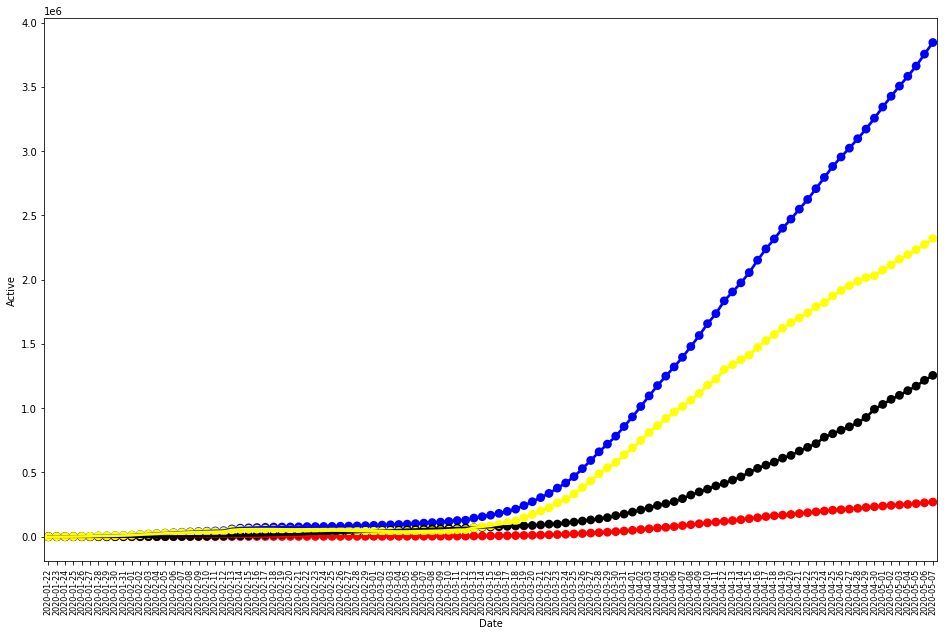

In [0]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90,fontsize=8)
x = total_confirmed['Date'].dt.date
y = total_confirmed['Confirmed']
x1 = total_confirmed['Date'].dt.date
y1 = total_confirmed['Deaths']
y2 = total_confirmed['Recovered']
y3 = total_confirmed['Active']
sns.pointplot(x,y,color='blue')
sns.pointplot(x1,y1,color='red')
sns.pointplot(x1,y2,color='black')
sns.pointplot(x1,y3,color='yellow')
plt.show()

In [0]:
### top 20 countries have 

top_actives= top.groupby('Country')['Confirmed','Recovered'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
top_actives.sort_values("Confirmed",ascending=False,inplace=True)

In [0]:
top_actives=top_actives.reset_index()
top_actives.head()

,Country,Confirmed,Recovered
0,US,1257023,195036
1,Spain,221447,128511
2,Italy,215858,96276
3,United Kingdom,207977,970
4,Russia,177160,23803


In [0]:
top_20 = top_actives.head(20)

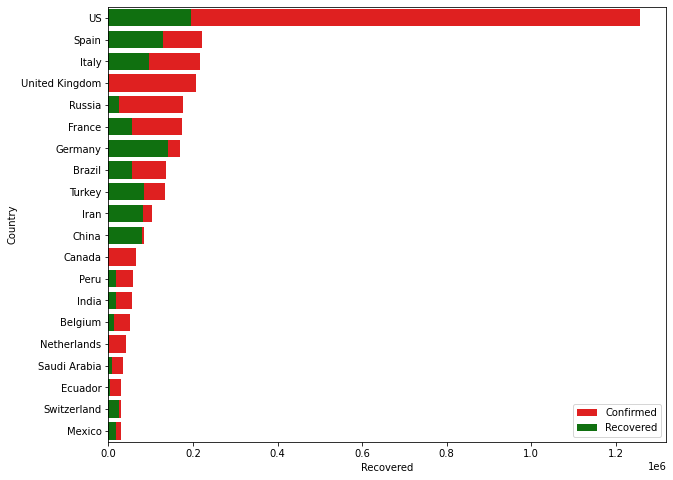

In [0]:
plt.figure(figsize=(10,8))
x = top_20['Confirmed']
y = top_20['Country']
x1 = top_20['Recovered']
sns.barplot(x,y,color='red',label="Confirmed")
sns.barplot(x1,y,color='green',label="Recovered")
plt.legend(loc=4)
plt.show()

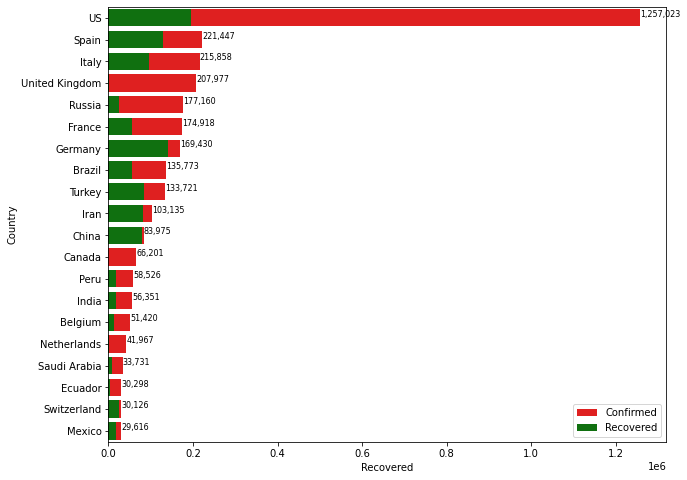

In [0]:
plt.figure(figsize=(10,8))
x = top_20['Confirmed']
y = top_20['Country']
x1 = top_20['Recovered']
ax = sns.barplot(x,y,color='red',label="Confirmed")
ax1 = sns.barplot(x1,y,color='green',label="Recovered")
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
  ax.text(value,i-0.05,f'{value:,.0f}',size=8)
plt.legend(loc=4)
plt.show()

In [0]:
top_20.to_csv("mydata.csv")

In [0]:
#### Filtering Data by Country
india = df[df['Country']=='India']
india = india.groupby('Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
india.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [0]:
china = df[df['Country']=='China']
china = china.groupby('Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
china.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970


In [0]:
us = df[df['Country']=='US']
us = us.groupby('Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
us.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5


In [0]:
spain = df[df['Country']=='Spain']
spain = spain.groupby('Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
spain.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [0]:
germany = df[df['Country']=='Germany']
germany = germany.groupby('Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
germany.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [0]:
italy = df[df['Country']=='Italy']
italy = italy.groupby('Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
italy.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


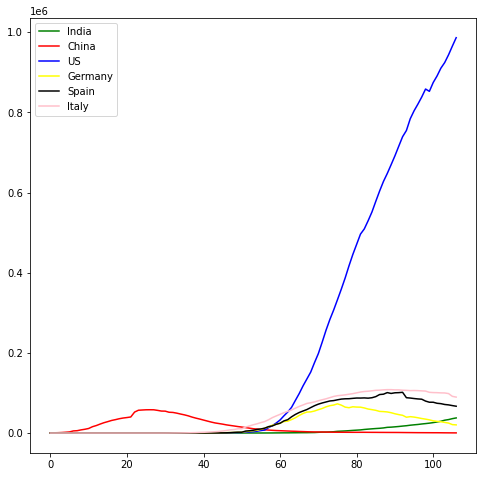

In [0]:
##### Plot active cases
plt.figure(figsize=(8,8))
plt.plot(india.index,india['Active'],color="Green",label="India")
plt.plot(china.index,china['Active'],color="Red",label="China")
plt.plot(us.index,us['Active'],color="blue",label="US")
plt.plot(germany.index,germany['Active'],color="yellow",label="Germany")
plt.plot(spain.index,spain['Active'],color="black",label="Spain")
plt.plot(italy.index,italy['Active'],color="pink",label="Italy")
plt.legend(loc=2)
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
